In [48]:
# import all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

#Replacing blanks with 0 , convert TotalCharges data type (object) into (float)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
data.isnull().sum() # check null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [54]:
data["customerID"].duplicated().sum() # check duplicate 

np.int64(0)

#replacing SeniorCitizen column value 1 to yes and 0 to no 

In [55]:
def cav(value):
  if value == 1:
      return "YES"
  else:
      return "NO"
data["SeniorCitizen"] = data["SeniorCitizen"].apply(cav)

In [56]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


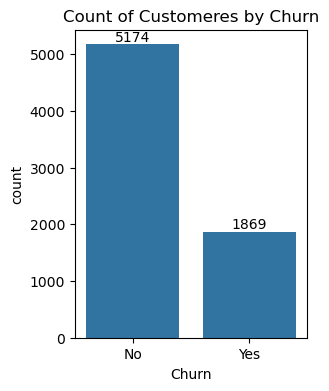

In [57]:
plt.figure(figsize = (3,4))
axs = sns.countplot(x="Churn",data=data)
axs.bar_label(axs.containers[0])
plt.title("Count of Customeres by Churn")
plt.show()

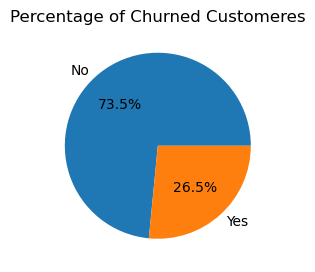

In [58]:
plt.figure(figsize = (3,4))
gb =data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],autopct = "%1.1f%%",labels = gb.index)
plt.title("Percentage of Churned Customeres")
plt.show()


#from the given pie chart we can conclude that 26.5% of our customeres have churned out. #now let's explore the reason behind it

[Text(0, 0, '939'), Text(0, 0, '930')]

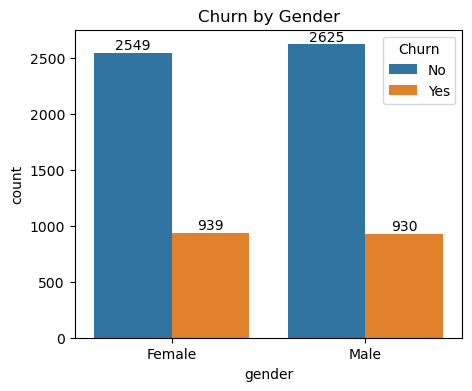

In [59]:
plt.figure(figsize = (5,4))
a = sns.countplot(x="gender",data=data, hue = "Churn")
plt.title("Churn by Gender")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])

Text(0.5, 1.0, 'Count of Customeres  by SeniorCitizen')

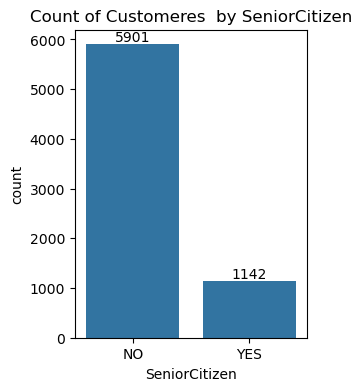

In [60]:
plt.figure(figsize = (3,4))
a = sns.countplot(x="SeniorCitizen",data=data)
a.bar_label(a.containers[0])
plt.title("Count of Customeres  by SeniorCitizen")

<Figure size 500x400 with 0 Axes>

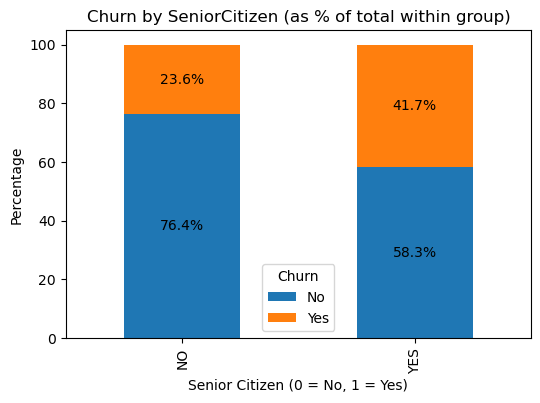

In [61]:
plt.figure(figsize = (5,4))
grouped = data.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="count")

# Calculate percentage within each SeniorCitizen group
grouped["percent"] = grouped.groupby("SeniorCitizen")["count"].transform(lambda x: x / x.sum() * 100)

# Pivot for plotting (fill NaN with 0 if missing Churn category)
pivot = grouped.pivot(index="SeniorCitizen", columns="Churn", values="percent").fillna(0)

# Plot stacked bar chart
ax = pivot.plot(kind="bar", stacked=True, figsize=(6,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (as % of total within group)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title="Churn")
plt.show()

#comparative a greater percentage of people in SeniorCitizen category have churned

<Axes: xlabel='tenure', ylabel='Count'>

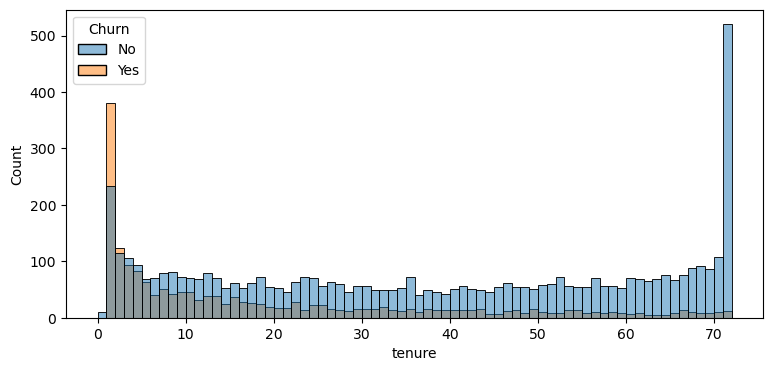

In [62]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" ,data = data , bins = 72,hue ="Churn")

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months  have churned

Text(0.5, 1.0, 'Count of Customeres  by Contract')

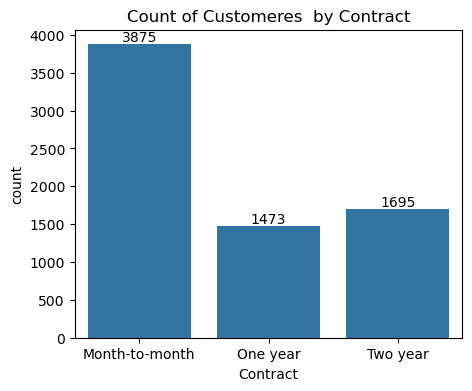

In [63]:
plt.figure(figsize = (5,4))
a = sns.countplot(x="Contract",data=data)
a.bar_label(a.containers[0])
plt.title("Count of Customeres  by Contract")

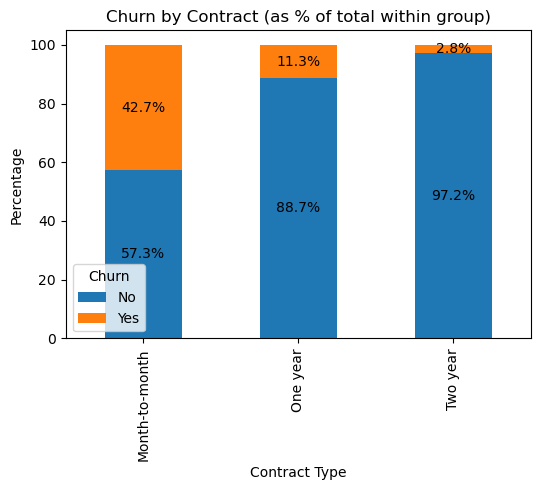

In [64]:
grouped = data.groupby(["Contract", "Churn"]).size().reset_index(name="count")

# Convert to percentage of each Contract group
grouped["percent"] = grouped.groupby("Contract")["count"].transform(lambda x: x / x.sum() * 100)

# Pivot for stacked bar
pivot = grouped.pivot(index="Contract", columns="Churn", values="percent").fillna(0)

# Plot stacked bar chart
ax = pivot.plot(kind="bar", stacked=True, figsize=(6,4))

# Add % labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by Contract (as % of total within group)")
plt.ylabel("Percentage")
plt.xlabel("Contract Type")
plt.legend(title="Churn")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [65]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

 # Customer Services vs Churn Analysis
*This visualization shows how different telecom services relate to customer churn. 
Each subplot compares service adoption (Yes/No) with churn behavior.*


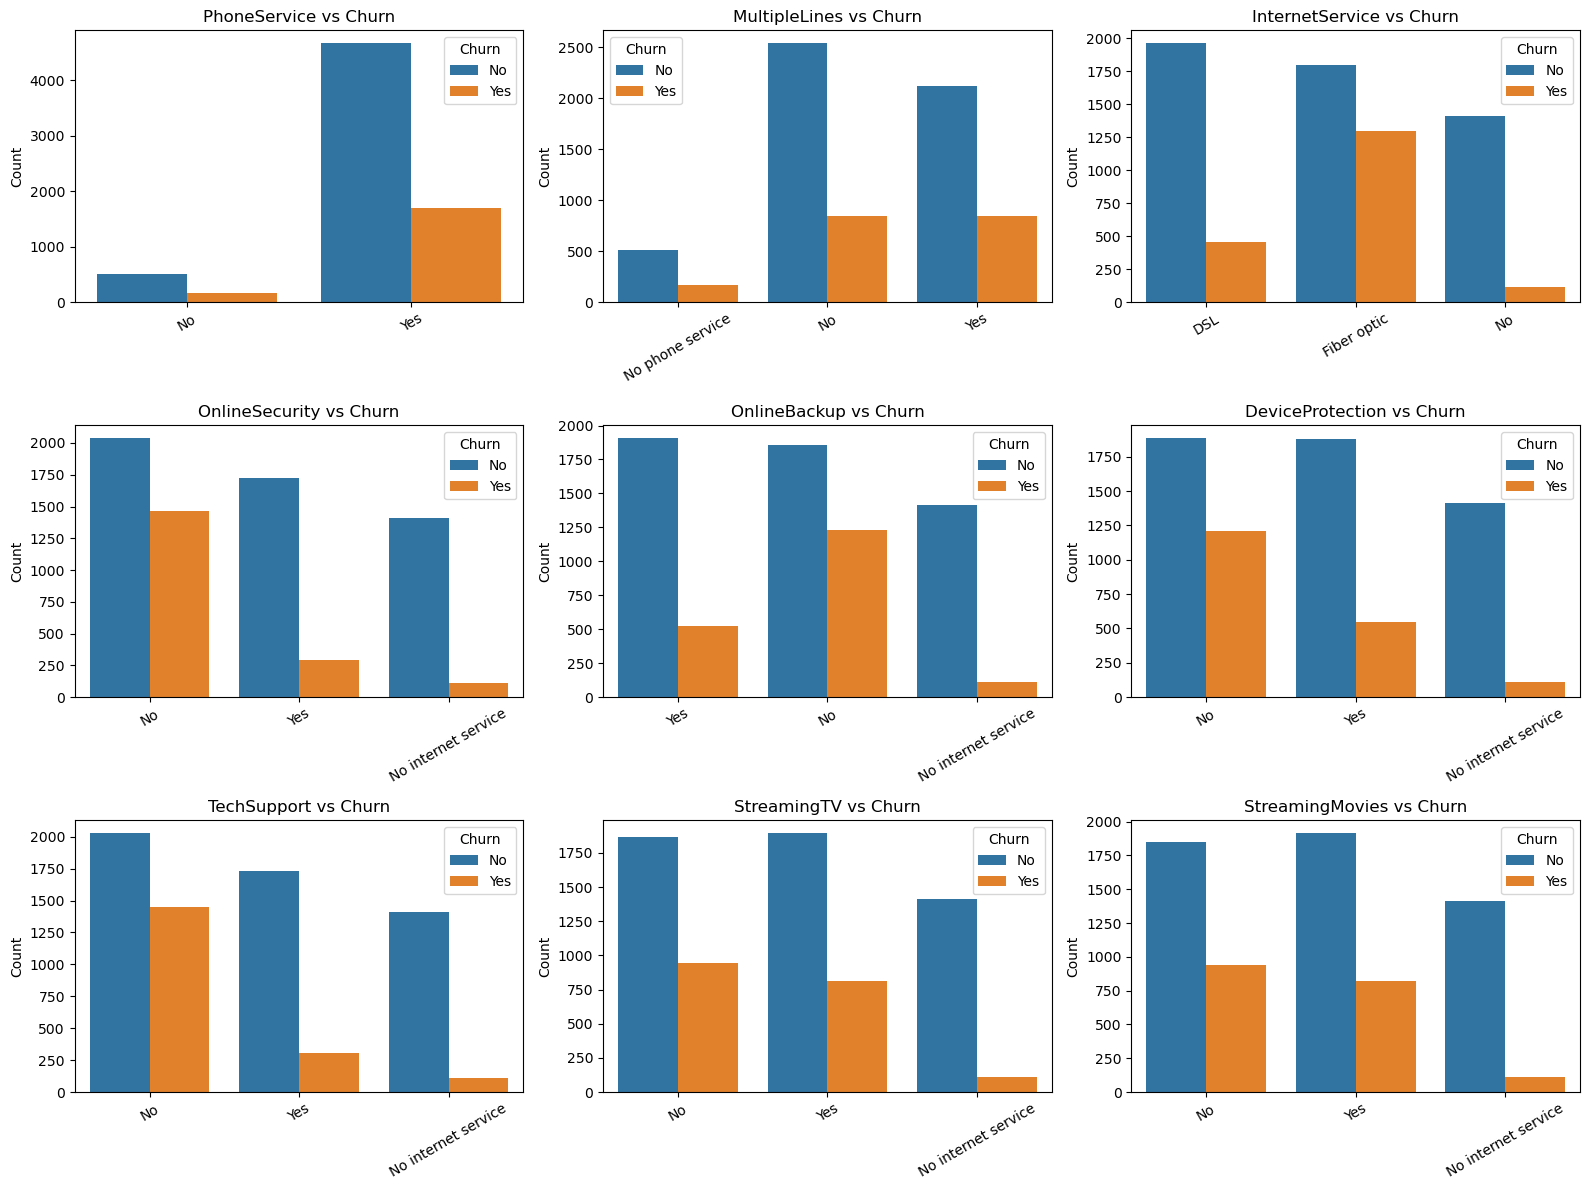

In [66]:

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, hue="Churn", data=data, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)
    
plt.tight_layout()
plt.show()


#From the plots, we can see that customers without online services like Security, Backup, Tech Support, or Streaming are more likely to churn compared to those who have them.
Fiber optic internet users show higher churn compared to DSL users.

Text(0.5, 1.0, 'Churned Customeres by PaymentMethod')

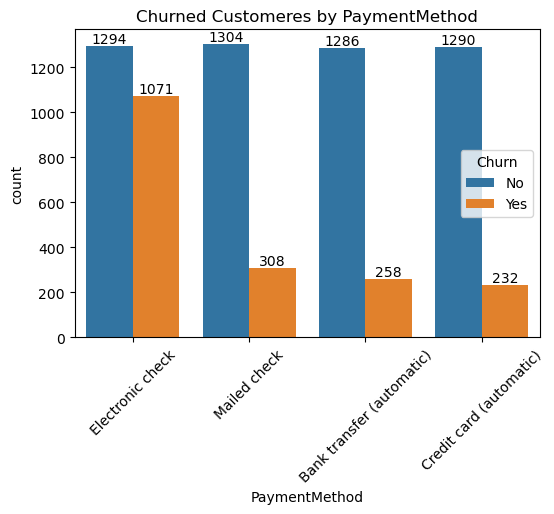

In [67]:
plt.figure(figsize = (6,4))
a = sns.countplot(x="PaymentMethod",data=data,hue = "Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customeres by PaymentMethod")

#customer is likely to churn when he is using electronic check as a payment method